In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp
import random
import time

### User Input


In [2]:
# print("Do you want personalized planning by providing some information like Height weight, etc.?")
print("If YES, Press X = 1, Otherwise X = 0")

x = int(input("X = "))


If YES, Press X = 1, Otherwise X = 0


X =  0


### Calculating BMR and Nutrients Constraints


In [4]:
#BMR calculation 
def calculate_bmr(gender, weight, height, age):
    if gender.lower() == 'male':
        return (10 * weight) + (6.25 * height) - (5 * age) + 5
    else:
        return (10 * weight) + (6.25 * height) - (5 * age) - 161

if(x==1):
    # user = {
    # 'name': 'Jamiya Alom',
    # 'age': 20,
    # 'gender': 'female',
    # 'height': 190,  # in cm
    # 'weight': 75,   # in kg
    # }

    user = {}

    # user input
    user['name'] = input("Enter your name: ")
    user['age'] = int(input("Enter your age: "))
    user['gender'] = input("Enter your gender (male/female): ").lower()
    user['height'] = float(input("Enter your height in cm: "))
    user['weight'] = float(input("Enter your weight in kg: "))

    bmr1= calculate_bmr(user['gender'], user['weight'], user['height'], user['age'])
    print(f"Calculated BMR: {bmr1:.2f} kcal")

    min_cal= bmr1 * 1.2
    max_cal = bmr1 * 1.9

    # Minimum Calory needed
    bmr= bmr1*1.2

    # Protein Calculation
    Pconst = (bmr*0.20)/4

    # Fat Calculation
    Fconst = (bmr * 0.25)/9

    #Sugar Calculation
    Sconst = (bmr * 0.12)/4

    Sodium_const = 2500

    print(f"Minimum Calory: {bmr:.2f}, min_cal: {min_cal}, max_cal: {max_cal}, min Protein: {Pconst}, max_fat: {Fconst}, max_sugar: {Sconst}, max_sodium:{Sodium_const}")
    
else:
    min_cal = 2200
    max_cal = 3500
    Pconst = 110
    Fconst = 61
    Sconst = 66
    Sodium_const = 2500
    print(f"min_cal: {min_cal}, max_cal: {max_cal}, min Protein: {Pconst}, max_fat: {Fconst}, max_sugar: {Sconst}, max_sodium:{Sodium_const}")

min_cal: 2200, max_cal: 3500, min Protein: 110, max_fat: 61, max_sugar: 66, max_sodium:2500


### Applying Linear Programming on small data

In [5]:
costs = [45, 38, 65, 85, 50, 40, 60, 70, 55, 48, 95, 78, 88, 120, 130]
calories = [350, 400, 390, 550, 300, 280, 500, 450, 330, 360, 600, 410, 420, 580, 590]
proteins = [12, 15, 22, 20, 10, 8, 16, 18, 12, 10, 25, 14, 17, 19, 18]
fats = [4, 6, 5, 10, 3, 2, 7, 6, 4, 3, 12, 6, 5, 11, 15]
sugars = [3, 14, 15, 10, 6, 5, 10, 12, 8, 4, 18, 9, 11, 16, 20]

model = pulp.LpProblem("Daily_Meal_Plan", pulp.LpMinimize)

# Binary variables: xi = 1 if food item i is selected
x = [pulp.LpVariable(f"x{i}", cat='Binary') for i in range(15)]

# Objective: Minimize total cost
model += pulp.lpSum(costs[i] * x[i] for i in range(15)), "Total Cost"
n=15
# Constraints
model += pulp.lpSum(x[i] for i in range(n)) >= 3
model += pulp.lpSum(x[i] for i in range(n)) <= 8
model += pulp.lpSum(calories[i] * x[i] for i in range(n)) >= 700
model += pulp.lpSum(calories[i] * x[i] for i in range(n)) <= 4000
model += pulp.lpSum(proteins[i] * x[i] for i in range(n)) >= Pconst
model += pulp.lpSum(fats[i] * x[i] for i in range(n)) <= Fconst
model += pulp.lpSum(sugars[i] * x[i] for i in range(n)) <= Sconst

# Solve the model
model.solve()

# ------------------------
# Output the results
# ------------------------
print("Status:", pulp.LpStatus[model.status])
print("Selected Food Items:")
for i in range(n):
    if x[i].varValue == 1:
        print(f"  Food {i+1}: Cost={costs[i]}, Cal={calories[i]}, Prot={proteins[i]}, Fat={fats[i]}, Sugar={sugars[i]}")
print(f"\nTotal Cost: {pulp.value(model.objective)} Baht")
print("\n")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Cellar/jupyterlab/4.4.1_1/libexec/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/5c/9f5969bx6x5_f07gtrkfm_vc0000gn/T/a6718b7e445c4b999f0956401a41f3f4-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/5c/9f5969bx6x5_f07gtrkfm_vc0000gn/T/a6718b7e445c4b999f0956401a41f3f4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 163 RHS
At line 171 BOUNDS
At line 187 ENDATA
Problem MODEL has 7 rows, 15 columns and 105 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 399.333 - 0.00 seconds
Cgl0004I processed model has 5 rows, 15 columns (15 integer (15 of which binary)) and 75 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.166667
Cbc0038I Pass   1

### Start Working with real-time dataset

In [6]:
#Data Loading
data = pd.read_csv("7_11_food_choices.csv")
data



,ITEM,Calories(kCal),Sugar(g),Protein(g),Fat(g),Sodium(mg),Price(baht)
0,Ham Cheese Sandwich,230.0,3.0,9.0,11.0,202.7,32
1,Salmon Onigiri,194.0,0.0,6.9,2.7,54.0,27
2,Tuna Cheese Toast Sandwich,310.0,5.0,11.0,20.0,154.0,32
3,Shredded Pork with salad\nCream Sandwich,260.0,12.0,8.0,13.0,230.0,32
4,Carbonara Danish Sandwich,390.0,4.0,8.0,26.0,6.0,32
...,...,...,...,...,...,...,...
91,Watermelon,30.0,6.0,0.6,0.2,1.0,20
92,Grapefruits,42.0,7.0,0.8,0.1,0.0,40
93,Passon Fruit,97.0,11.0,2.2,0.7,28.0,30
94,Kiwi,60.0,9.0,1.1,0.5,3.0,40


In [7]:
#Extracting the data and convert it to the list
prices     = data['Price(baht)'].tolist()
calories  = data['Calories(kCal)'].tolist()
proteins  = data['Protein(g)'].tolist()
fats      = data['Fat(g)'].tolist()
sugars    = data['Sugar(g)'].tolist()
sodium    = data['Sodium(mg)'].tolist()
items     = data['ITEM'].tolist()

n = len(data)  # Total food items

min_item = 3
max_item = 9

# LINEAR PROGRAMMING


In [8]:
start_time = time.time()

#LP Model
model = pulp.LpProblem("Daily_Meal_Plan", pulp.LpMinimize)

#xi = 1 if item i is selected
x = [pulp.LpVariable(f"x{i}", cat='Binary') for i in range(n)]

#Objective: Minimizing total cost
model += pulp.lpSum(prices[i] * x[i] for i in range(n)), "Total Cost"

#Constraints
model += pulp.lpSum(x[i] for i in range(n)) >= min_item
model += pulp.lpSum(x[i] for i in range(n)) <= max_item
model += pulp.lpSum(calories[i] * x[i] for i in range(n)) >= min_cal
model += pulp.lpSum(calories[i] * x[i] for i in range(n)) <= max_cal
model += pulp.lpSum(proteins[i] * x[i] for i in range(n)) >= Pconst
model += pulp.lpSum(fats[i] * x[i] for i in range(n)) <= Fconst
model += pulp.lpSum(sugars[i] * x[i] for i in range(n)) <= Sconst
model += pulp.lpSum(sodium[i] * x[i] for i in range(n)) <= Sodium_const

#Solve the model
model.solve()

end_time = time.time()
execution_time = end_time - start_time

#Output 
print("Status:", pulp.LpStatus[model.status])
print("\nSelected Food Items:")
total_cost = 0
total_cal = 0
total_protein = 0
total_fat = 0
total_sugar = 0
total_sodium = 0
selected_item = 0

for i in range(n):
    if x[i].varValue == 1:
        selected_item += 1
        print(f"  {items[i]} | Cost: {prices[i]} Baht | Cal: {calories[i]} | Prot: {proteins[i]} | Fat: {fats[i]} | Sugar: {sugars[i]} | Sodium: {sodium[i]}")
        total_cost += prices[i]
        total_cal += calories[i]
        total_protein += proteins[i]
        total_fat += fats[i]
        total_sugar += sugars[i]
        total_sodium += sodium[i]

print("\nSummary of Best Meal Plan:")
print(f"\nTotal Selected Food Items: {selected_item}")
print(f"Total Cost: {total_cost:.2f} Baht")

if(total_cal >= min_cal and total_cal <= max_cal):
    print(f"\nTotal Cal: {total_cal} Kcal. ---- Calory Requirements: Satisfied :)")
else: print(f"\nTotal Cal: {total_cal} Kcal. ---- Calory Requirements: not Satisfied :(")
    
#Total Protein
if(total_protein >= Pconst):
    print(f"\nTotal Protein: {total_protein} g. ---- Protein Requirements: Satisfied :)")
else: print(f"\nTotal Protein: {total_protein} g. ---- Protein Requirements: Not Satisfied :(")

#Total Fat
if(total_fat <= Fconst):
    print(f"\nTotal fat: {total_fat} g. --------- Fat Requirements: Satisfied :)")
else: print(f"\nTotal fat: {total_fat} g. --------- Fat Requirements: Not Satisfied :(")

#Total Sugar
if(total_sugar <= Sconst):
    print(f"\nTotal sugar: {total_sugar} g. ------- Sugar Requirements: Satisfied :)")
else: print(f"\nTotal sugar: {total_sugar} g. ------- Sugar Requirements: Not Satisfied :(")    

#Total Sodium
if(total_sodium <= Sodium_const):
    print(f"\nTotal sodium: {total_sodium} mg. --- Sodium Requirements: Satisfied :)")
else: print(f"\nTotal sodium: {total_sodium} mg. --- Sodium Requirements: Not Satisfied :(")  

print(f"Computation Time: {execution_time:.2f} ")
print("\n")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/Cellar/jupyterlab/4.4.1_1/libexec/lib/python3.13/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/5c/9f5969bx6x5_f07gtrkfm_vc0000gn/T/c032836b00d34f0da574ba521a51cfc5-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/5c/9f5969bx6x5_f07gtrkfm_vc0000gn/T/c032836b00d34f0da574ba521a51cfc5-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 1021 RHS
At line 1030 BOUNDS
At line 1127 ENDATA
Problem MODEL has 8 rows, 96 columns and 719 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 160.009 - 0.00 seconds
Cgl0003I 1 fixed, 0 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0004I processed model has 6 rows, 92 columns (92 integer (90 of which binary)) and 512 elements
Cutoff increment increased from 1e-05 to 0.9999
C

# Genetic Algorithm


In [9]:
POPULATION_SIZE = 100
GENERATIONS = 300
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.1
ELITE_COUNT = 5

### Chromosome Creation

In [10]:
def create_chromosome():
    for _ in range(1000): 
        chromosome = []
        for _ in range(n):
            # chromosome = [random.randint(0, 1) for _ in range(n)]
            # if min_item <= sum(chromosome):
            #     return chromosome
            if random.random() < 0.1:
                chromosome.append(1)
            else:
                chromosome.append(0)
        if min_item <= sum(chromosome) <= max_item:
            #print(f"\nChromosome selection...{chromosome}")
            return chromosome

    # If failed to create a valid one, force-select min items items
    chromosome = [0] * n
    selected_indices = random.sample(range(n), min_item)
    for idx in selected_indices:
        chromosome[idx] = 1
        #print("\nForce Chromosome selection...")
    return chromosome

### Fitness Function

In [11]:
def fitness(chromosome):
    total_price = 0
    total_calories = 0
    total_protein = 0
    total_fat = 0
    total_sugar = 0
    total_sodium = 0
    item_count = 0

    for i in range(n):
        if chromosome[i]:
            total_price += prices[i]
            total_calories += calories[i]
            total_protein += proteins[i]
            total_fat += fats[i]
            total_sugar += sugars[i]
            total_sodium += sodium[i]
            item_count += 1

    penalty = 0
    if item_count < min_item or item_count > max_item:
        penalty += 100
    if total_calories < min_cal or total_calories > max_cal:
        penalty += 100
    if total_protein < Pconst:
        penalty += 100
    if total_fat > Fconst:
        penalty += 100
    if total_sugar > Scont:
        penalty += 100
    if total_sodium > Sodium_const:
        penalty += 100

    return total_price + penalty

### Selection

In [12]:
def select(population):
    candidates = random.sample(population, 3)
    return min(candidates, key=fitness)

### Crossover

In [13]:
def crossover(parent1, parent2):
    """
    Single-point crossover with correction for item count.
    """
    if random.random() < CROSSOVER_RATE:
        point = random.randint(1, n - 2)
        child1 = fix_chromosome(parent1[:point] + parent2[point:])
        child2 = fix_chromosome(parent2[:point] + parent1[point:])
        return [child1, child2]
    return [parent1[:], parent2[:]]

### Mutation

In [14]:
def mutate(chromosome):
    """
    Randomly flips genes based on mutation rate, then fixes item count if needed.
    """
    for i in range(n):
        if random.random() < MUTATION_RATE:
            chromosome[i] = 1 - chromosome[i]
    return fix_chromosome(chromosome)

In [15]:
def fix_chromosome(chromosome):
    """
    Ensures that the number of selected items is within valid range.
    """
    while sum(chromosome) < min_item:
        index = random.randint(0, n - 1)
        chromosome[index] = 1
    while sum(chromosome) > max_item:
        ones = [i for i in range(n) if chromosome[i] == 1]
        chromosome[random.choice(ones)] = 0
    return chromosome

### Main Function

In [16]:
NUM_RUNS = 13  # Number of GA runs
all_best_costs = []
all_avg_costs = []
all_execution_times = []

for run in range(NUM_RUNS):

    print(f"\n=== GA Run {run + 1} ===")

    start_time = time.time()

    print("\nRunning Genetic Algorithm...")

    # population = []
    # for _ in range(POPULATION_SIZE):
    #     population.append(create_chromosome())
    population = [create_chromosome() for _ in range(POPULATION_SIZE)]

    best_costs = []
    average_costs = []
    selects_cost = []

    for generation in range(GENERATIONS):
       
        new_population = sorted(population, key=fitness)[:ELITE_COUNT]  #Elitism

        best_fitness = fitness(new_population[0])
        best_costs.append(best_fitness)

        average_costs.append(sum(fitness(c) for c in population) / len(population))
    

        # Generate the rest of the population
        while len(new_population) < POPULATION_SIZE:
            parent1 = select(population)
            parent2 = select(population)
            offspring = crossover(parent1, parent2)
            for child in offspring:
                new_population.append(mutate(child))
    
        population = new_population


    print("\nBest Daily Meal Plan (3–6 items):")
    best_chromosome = min(population, key=fitness)

    total_cost = 0
    total_calories = 0
    total_protein = 0
    total_fat = 0
    total_sugar = 0
    total_sodium = 0

    for i in range(n):
        if best_chromosome[i]:
            print(f" - {items[i]} | {calories[i]} Kcal | Price: {prices[i]} Baht| Protein: {proteins[i]} g | Fat: {fats[i]} g | Sugar: {sugars[i]} g")
            total_cost += prices[i]
            total_calories += calories[i]
            total_protein += proteins[i]
            total_fat += fats[i]
            total_sugar += sugars[i]
            total_sodium += sodium[i]


    print("\nSummary of Best Meal Plan:")

   
    print(f"Total Cost: {total_cost:.2f} Baht")
    print(total_cal)

    if(total_cal >= min_cal and total_cal <= max_cal):
        print(f"\nTotal Cal: {total_cal:.2f} Kcal. ---- Calory Requirements: Satisfied :)")
    else: print(f"\nTotal Cal: {total_cal:.2f} Kcal. ---- Calory Requirements: not Satisfied :(")
    
    #Total Protein
    if(total_protein >= Pconst):
        print(f"\nTotal Protein: {total_protein:.2f} g. ---- Protein Requirements: Satisfied :)")
    else: print(f"\nTotal Protein: {total_protein:.2f} g. ---- Protein Requirements: Not Satisfied :(")

    #Total Fat
    if(total_fat <= Fconst):
        print(f"\nTotal fat: {total_fat:.2f} g. --------- Fat Requirements: Satisfied :)")
    else: print(f"\nTotal fat: {total_fat:.2f} g. --------- Fat Requirements: Not Satisfied :(")

    #Total Sugar
    if(total_sugar <= Sconst):
        print(f"\nTotal sugar: {total_sugar:.2f} g. ------- Sugar Requirements: Satisfied :)")
    else: print(f"\nTotal sugar: {total_sugar:.2f} g. ------- Sugar Requirements: Not Satisfied :(")    

    #Total Sodium
    if(total_sodium <= Sodium_const):
        print(f"\nTotal sodium: {total_sodium:.2f} mg. --- Sodium Requirements: Satisfied :)")
    else: print(f"\nTotal sodium: {total_sodium:.2f} mg. --- Sodium Requirements: Not Satisfied :(") 

    all_best_costs.append(min(best_costs))
    all_avg_costs.append(average_costs[-1])
    all_execution_times.append(time.time() - start_time)
    print(f"Best Cost: {min(best_costs):.2f}, Avg Cost: {average_costs[-1]:.2f}, Time: {all_execution_times[-1]:.2f}s")

    print("\n")


=== GA Run 1 ===

Running Genetic Algorithm...

Best Daily Meal Plan (3–6 items):
 - Kelloggs Corn Flakes | 365.0 Kcal | Price: 30 Baht| Protein: 7.0 g | Fat: 0.8 g | Sugar: 9.0 g
 - Ezygn firied Rice with Korean
Style Chicken | 500.0 Kcal | Price: 35 Baht| Protein: 20.0 g | Fat: 19.0 g | Sugar: 8.0 g
 - Spicy Glass Noodles Stir•Fried
with Shrimp with Climbing Wattle | 885.0 Kcal | Price: 50 Baht| Protein: 20.0 g | Fat: 5.0 g | Sugar: 4.2 g
 - Cream-O Caramel | 90.0 Kcal | Price: 10 Baht| Protein: 1.0 g | Fat: 4.5 g | Sugar: 6.0 g
 - Flower Food Roasted Pumpkin Chips | 130.0 Kcal | Price: 20 Baht| Protein: 9.0 g | Fat: 8.0 g | Sugar: 0.0 g
 - Tivoli Combo | 150.0 Kcal | Price: 10 Baht| Protein: 2.0 g | Fat: 8.0 g | Sugar: 12.0 g
 - Tivoli Chocolate | 130.0 Kcal | Price: 10 Baht| Protein: 2.0 g | Fat: 7.0 g | Sugar: 11.0 g
 - Tivoli Twin Chocolate  | 80.0 Kcal | Price: 10 Baht| Protein: 1.0 g | Fat: 4.5 g | Sugar: 6.0 g
 - Pepsi Max Taste | 0.0 Kcal | Price: 12 Baht| Protein: 0.0 g | F

In [142]:
print("\n GA all Run Summary-")
print(f"Min of All Best Cost over {NUM_RUNS} runs: {min(all_best_costs):.2f}")
print(f"Max of All Best Cost over {NUM_RUNS} runs: {max(all_best_costs):.2f}")
print(f"Average Best Cost over {NUM_RUNS} runs: {sum(all_best_costs)/NUM_RUNS:.2f}")
print(f"Average after {NUM_RUNS} runs: {sum(all_avg_costs)/NUM_RUNS:.2f}")
print(f"Average Execution Time: {sum(all_execution_times)/NUM_RUNS:.2f} seconds")


 GA all Run Summary-
Min of All Best Cost over 13 runs: 245.00
Max of All Best Cost over 13 runs: 294.00
Average Best Cost over 13 runs: 270.54
Average after 13 runs: 554.88
Average Execution Time: 0.83 seconds


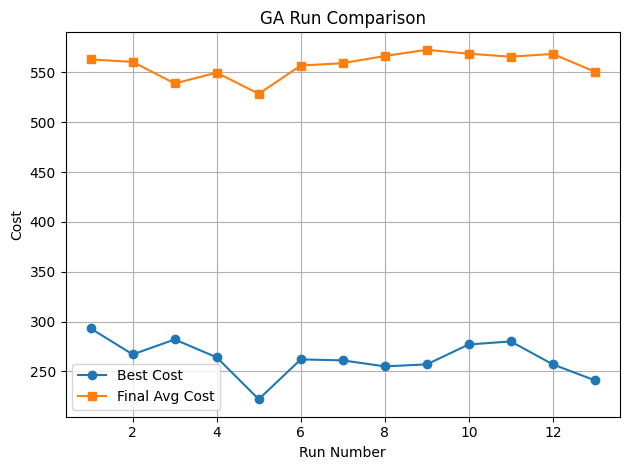

In [198]:
#Plotting 
plt.plot(range(1, NUM_RUNS+1), all_best_costs, marker='o', label='Best Cost')
plt.plot(range(1, NUM_RUNS+1), all_avg_costs, marker='s', label='Final Avg Cost')
plt.title("GA Run Comparison")
plt.xlabel("Run Number")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

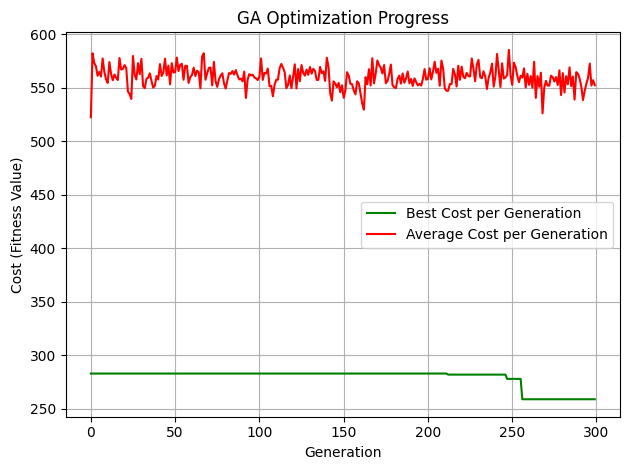

In [202]:
#Plotting Over Generations
plt.plot(best_costs, label='Best Cost per Generation', color='green')
plt.plot(average_costs, label='Average Cost per Generation', color='red')
plt.xlabel('Generation')
plt.ylabel('Cost (Fitness Value)')
plt.title('GA Optimization Progress')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()